In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [111]:
df = pd.read_csv('graduation_dataset.csv',encoding='utf-8-sig')

In [112]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation        

In [113]:
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
        Marital status  Application mode  Application order       Course  \
count      4424.000000       4424.000000        4424.000000  4424.000000   
unique             NaN               NaN                NaN          NaN   
top                NaN               NaN                NaN          NaN   
freq               NaN               NaN                NaN          NaN   
mean          1.178571          6.886980           1.727848     9.899186   
std           0.605747          5.298964           1.313793     4.331792   
min           1.000000          1.000000           0.000000     1.000000   
25%           1.000000          1.000000           1.000000     6.000000   
50%           1.000000          8.000000           1.000000    10.000000   
75%           1.000000         12.000000           2.000000    13.000000   
max           6.000000         18.000000           9.000000    17.000000   

        Daytime/evening attendance  Previous qualification  Nacion

In [114]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [115]:
df.dropna(inplace=True)

In [116]:


df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [117]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# SeaBorn Plots vizualization

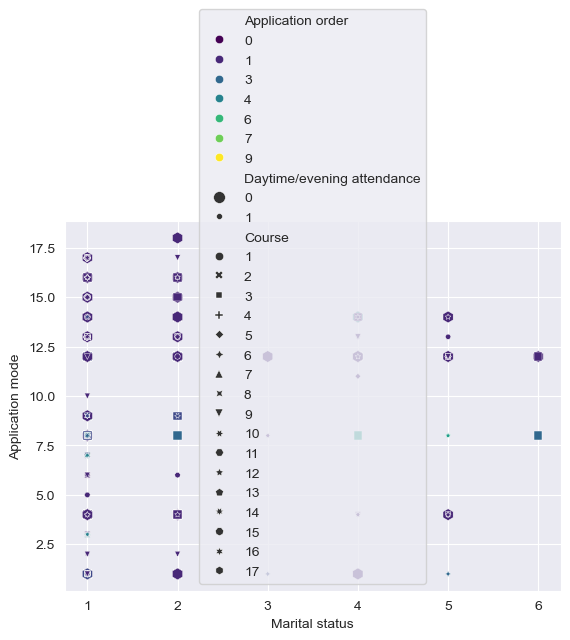

In [118]:
sns.scatterplot(data=df, x=df.columns[0], y=df.columns[1], hue=df.columns[2], style=df.columns[3], size=df.columns[4], palette='viridis')
plt.show()


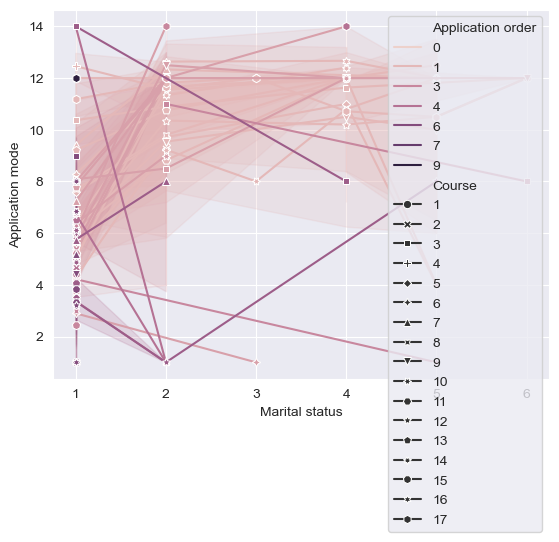

In [119]:
sns.lineplot(data=df, x=df.columns[0], y=df.columns[1], hue=df.columns[2], style=df.columns[3], markers=True, dashes=False)
plt.show()

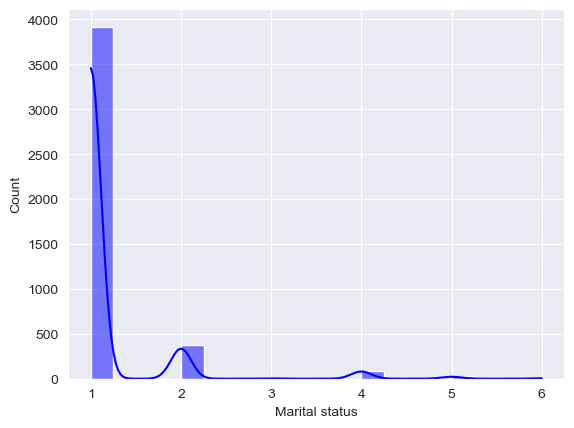

In [120]:
sns.histplot(df[df.columns[0]], bins=20, kde=True, color='blue')
plt.show()


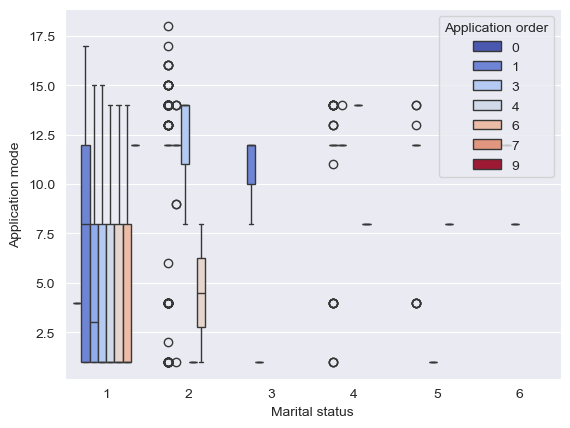

In [121]:

sns.boxplot(data=df, x=df.columns[0], y=df.columns[1], hue=df.columns[2], palette='coolwarm', dodge=True)
plt.show()

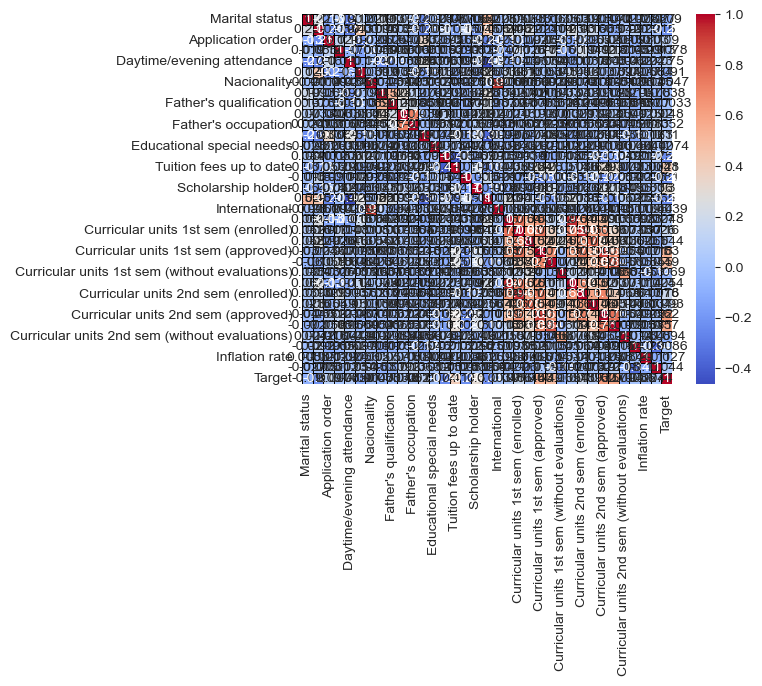

In [122]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', square=True)
plt.show()

### Important Matplotlib visualizations with all arguments

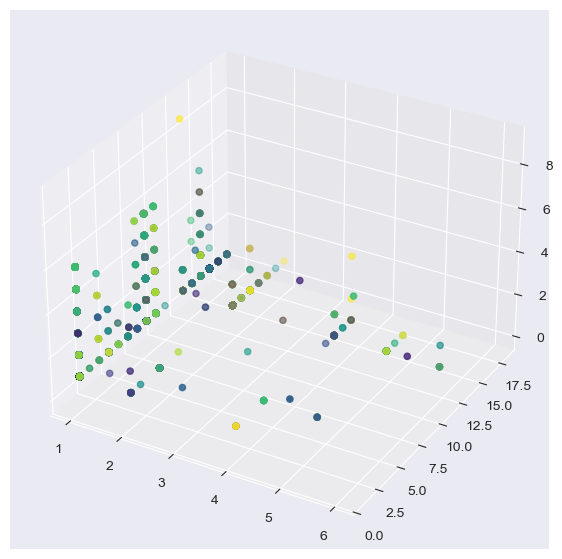

In [123]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[df.columns[0]], df[df.columns[1]], df[df.columns[2]], c=df[df.columns[3]], cmap='viridis')
plt.show()

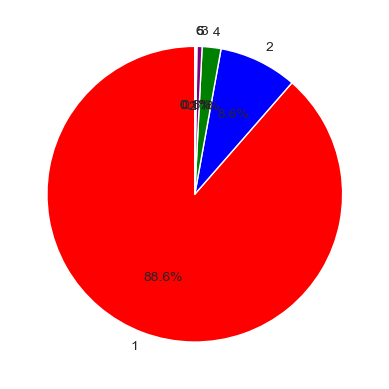

In [124]:
plt.pie(df[df.columns[0]].value_counts(), labels=df[df.columns[0]].unique(), autopct='%1.1f%%', startangle=90, colors=['red', 'blue', 'green', 'purple'])
plt.show()

In [125]:
X = df.drop(columns=['Target'])  # Replace with actual target column
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [126]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [127]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

In [128]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       316
           1       0.48      0.25      0.32       151
           2       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.69      0.65      0.65       885
weighted avg       0.73      0.76      0.73       885

Accuracy: 0.7559

SVM Performance:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       316
           1       0.50      0.32      0.39       151
           2       0.75      0.93      0.83       418

    accuracy                           0.76       885
   macro avg       0.71      0.67      0.67       885
weighted avg       0.75      0.76      0.75       885

Accuracy: 0.7605

KNN Performance:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       316
           1       0.39  